# Fitting a robust regression model using RANSAC
Linear regression models can be heavily impacted by the presence of outliers. In certain situations, a very small subset of our data can have a big effect on the estimated model coefficients. As an alternative to throwing out outliers, we will look at a robust method of regression using the RANdom SAmple Consensus (<b>RANSAC</b>) algorithm, which fits a regression model to a subset of the data, the so-called <b>inliers</b>. We can summarize the iterative RANSAC algorithm as follows:

<ol>
<li>Select a random number of samples to be inliers and fit the model.
<li>Test all other data points against the fitted model and add those points that fall within a user-given tolerance to the inliers.
<li>Refit the model using all inliers.
<li>Estimate the error of the fitted model versus the inliers.
<li>Terminate the algorithm if the performance meets a certain user-defined threshold or if a fixed number of iterations has been reached; go back to step 1 otherwise.
</ol>

/Users/surthi/Envs/venv/lib/python2.7/site-packages/sklearn/linear_model/ransac.py:261: DeprecationWarning: 'residual_metric' was deprecated in version 0.18 and will be removed in version 0.20. Use 'loss' instead.
  DeprecationWarning)


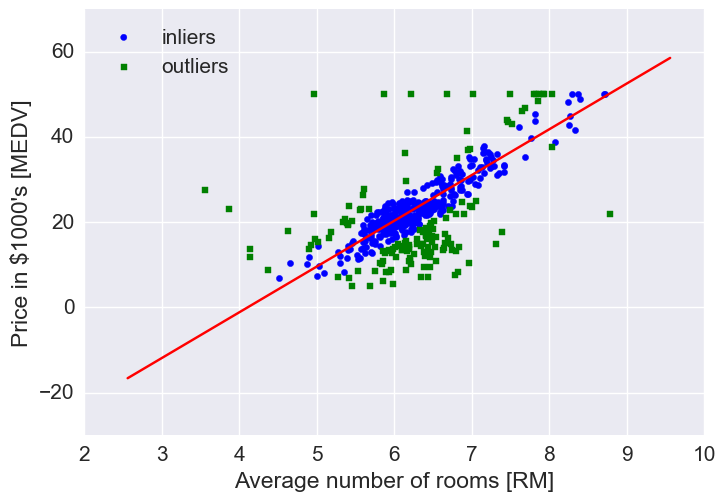

In [15]:
import pandas as pd
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data', header=None, sep='\s+')
df.columns= ['CRIM', 'ZN', 'INDUS', 'CHAS', 
             'NOX', 'RM', 'AGE', 'DIS', 'RAD', 
             'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
X = df[['RM']].values
X = X.reshape(X.shape[0], -1)
y = df['MEDV'].values
y = y.reshape(y.shape[0], -1)

from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import LinearRegression

ransac = RANSACRegressor(LinearRegression(),
               max_trials=100,
               min_samples=50,
               residual_metric=lambda x: np.sum(np.abs(x), axis=1), 
               residual_threshold=5.0,
               random_state=0)

ransac.fit(X,y)
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)

line_X = np.arange(X.min()-1, X.max()+1, 1)
line_y = ransac.predict(line_X[:, np.newaxis])
plt.scatter(X[inlier_mask], y[inlier_mask], color='blue', marker='o', label='inliers')
plt.scatter(X[outlier_mask], y[outlier_mask], color='green', marker='s', label='outliers')
plt.plot(line_X, line_y, color='red')
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper left')
plt.show()

<html><ol>
<li> Using the residual_metric parameter, we provided a callable lambda function that simply calculates the absolute vertical distances between the fitted line and the sample points.
<li> By setting the residual_threshold parameter to 5.0, we only allowed samples to be included in the inlier set if their vertical distance to the fitted line is within 5 distance units.
<li> By default, scikit-learn uses the MAD estimate to select the inlier threshold, where MAD stands for the Median Absolute Deviation of the target values y. However, the choice of an appropriate value for the inlier threshold is problem-specific, which is one disadvantage of RANSAC.
<li> You can find a detailed discussion in R. Toldo and A. Fusiello's. Automatic Estimation of the Inlier Threshold in Robust Multiple Structures Fitting
<ol>
</html>

In [16]:
print('Ransac Slope: %.3f' % ransac.estimator_.coef_[0])
print('Ransac Intercept: %.3f' % ransac.estimator_.intercept_)

Slope: 10.735
Intercept: -44.089


Q&A:
    -  There are many statistical tests that can be used to detect outliers, which are beyond the scope of the book. 
    - understand wht does residual metric do? -> lambda x: np.sum(np.abs(x), axis=1)